<a href="https://colab.research.google.com/github/marinaepitropaki/Data_Visualization/blob/master/Calibration_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
from scipy import stats
%matplotlib inline
from matplotlib import pyplot as plt
import glob
from google.colab import drive
from astropy.io import fits
from astropy.visualization import hist
from astropy.stats import mad_std
import matplotlib.ticker as ticker
import pandas as pd
import random

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Path for bias or darks or flats FIT files

files = sorted(glob.glob('/content/drive/My Drive/AstroPractice/bdf/bias*.fit'))[:28]

files

['/content/drive/My Drive/AstroPractice/bdf/bias-001.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-002.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-003.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-004.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-005.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-006.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-007.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-008.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-009.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-010.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-011.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-012.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-013.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-014.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-015.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-016.fit',
 '/content/drive/My Drive/AstroPractice/bdf/bias-017.fit

In [ ]:
#Calculation of the median and the average of the each file

median = []
average = []
data_list = []
for f in files:
  data = fits.getdata(f)
  print('\nfile name:',f)
  data_list.append(data)
  new_med = np.median(data, axis=None)
  new_avg = np.average(data, axis=None)
  median.append(new_med)
  average.append(new_avg)
  print('Average:', new_avg,'\nMedian:' ,new_med)

print('#######################################################')

#Calculation of the median and the average of the master file

master_data = fits.getdata('/content/drive/My Drive/AstroPractice/bdf/masters/combined_bias.fit')
print('\nfile name:master')

master_median = np.median(master_data, axis=None)
master_average = np.average(master_data, axis=None)

print('Master Average:', master_average,'\nMaster Median:' ,master_median)

print('\n#############################################')

# Calculation of the average of the averages
for a in average:
  print('\nAverage:',a)
  new_mean=np.average(average,axis=None)
  new_median=np.median(average, axis=None)
  new_std=np.std(average, axis=None)
  print('\nAverage of the average:', new_mean, '\nMedian of the average:', new_median,)


print('\n#####################################################') 
print('Average:', average,'\n\nMedian:' ,median,'\n\nAverage of the average:', new_mean,
      '\n\nMedian of the average:', new_median,'\n\nStandard deviation of the average :', new_std)


file name: /content/drive/My Drive/AstroPractice/bdf/bias-001.fit
Average: 314.7908878326416 
Median: 315.0

file name: /content/drive/My Drive/AstroPractice/bdf/bias-002.fit
Average: 314.8086233139038 
Median: 315.0

file name: /content/drive/My Drive/AstroPractice/bdf/bias-003.fit
Average: 314.8390598297119 
Median: 315.0

file name: /content/drive/My Drive/AstroPractice/bdf/bias-004.fit
Average: 315.03722763061523 
Median: 315.0

file name: /content/drive/My Drive/AstroPractice/bdf/bias-005.fit
Average: 315.1492586135864 
Median: 315.0

file name: /content/drive/My Drive/AstroPractice/bdf/bias-006.fit
Average: 314.5195779800415 
Median: 315.0

file name: /content/drive/My Drive/AstroPractice/bdf/bias-007.fit
Average: 314.568151473999 
Median: 315.0

file name: /content/drive/My Drive/AstroPractice/bdf/bias-008.fit
Average: 313.89050102233887 
Median: 314.0

file name: /content/drive/My Drive/AstroPractice/bdf/bias-009.fit
Average: 314.9039421081543 
Median: 315.0

file name: /conte

[313.         313.5        314.         314.5        315.
 315.5        316.         314.50787258 314.5        314.6179347 ]


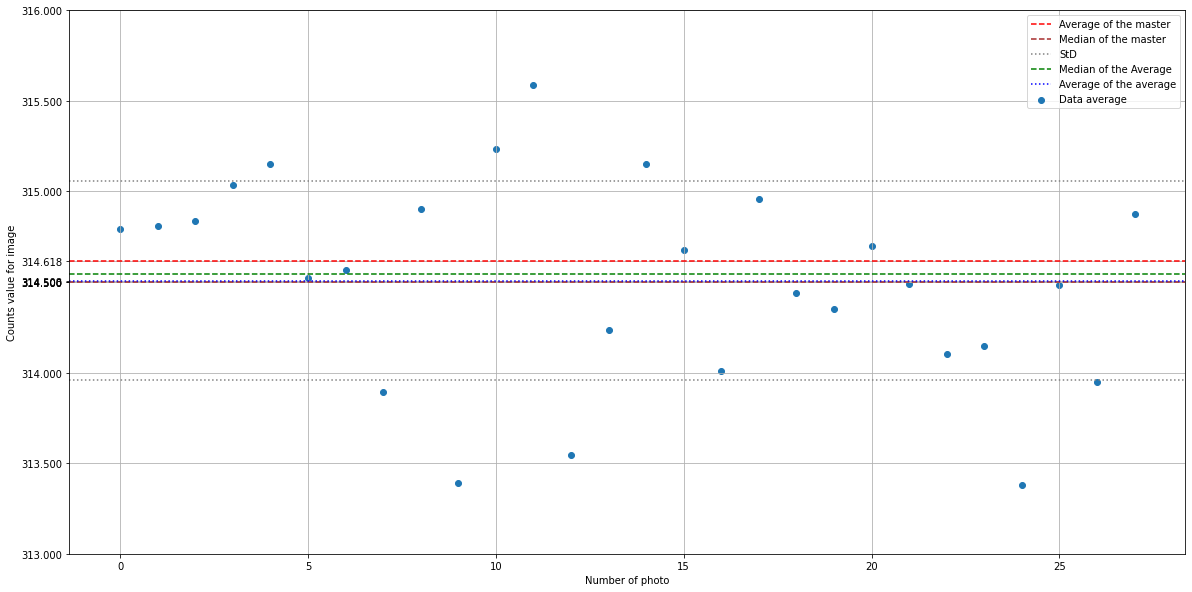

In [ ]:
#Plot of the averages

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.grid()
ax.scatter(range(len(average)), average,marker='o' ,label='Data average' )
ax.axhline(y=master_average, linestyle='dashed', label='Average of the master', color='red' )
ax.axhline(y=master_median, linestyle='dashed', label='Median of the master', color='brown' )
ax.axhline(y=np.add(new_mean,new_std), linestyle='dotted', label='StD', color='gray')
ax.axhline(y=np.subtract(new_mean,new_std), linestyle='dotted', color='gray')
ax.axhline(y=new_median, linestyle='dashed', label='Median of the Average', color='green')
ax.axhline(y=new_mean, xmin=0, xmax=30, linestyle='dotted', label='Average of the average', color='blue')
tick_list = ax.get_yticks()
tick_list = np.append(tick_list, [new_mean, master_median, master_average,])
plt.yticks(tick_list)
ax.set_xlabel("Number of photo")
ax.set_ylabel("Counts value for image")
ax.legend()
ax.set_ylim(313, 316)
#tick not text
print(tick_list)
plt.show()

# New Section

In [ ]:
#Histograms

In [ ]:
#Data Process

#Flattenning for ONE image
file_data=fits.getdata('/content/drive/My Drive/AstroPractice/bdf/bias-001.fit')
file_1D=file_data.flatten()
print(file_1D)

#For every image one histogram in subplots
# enumerate
for i, f in enumerate(files):
    print(i, f)

#n0 of subplot
subplot_number = len(files)


hist_data_list = []
for d in data_list:
  hist_data_list.append(d.flatten())
print(hist_data_list)

#Finding the min and max to fit the axes
min_xaxis_data= np.min(hist_data_list)
max_xaxis_data= np.max(hist_data_list)

print('\nMinimum x', min_xaxis_data,'\nMaximum x', max_xaxis_data)

#Combined Image
master_data=fits.getdata('/content/drive/My Drive/AstroPractice/bdf/masters/combined_bias.fit')
master_1D=master_data.flatten()
print(master_1D)


[311 301 304 ... 320 317 314]
0 /content/drive/My Drive/AstroPractice/bdf/bias-001.fit
1 /content/drive/My Drive/AstroPractice/bdf/bias-002.fit
2 /content/drive/My Drive/AstroPractice/bdf/bias-003.fit
3 /content/drive/My Drive/AstroPractice/bdf/bias-004.fit
4 /content/drive/My Drive/AstroPractice/bdf/bias-005.fit
5 /content/drive/My Drive/AstroPractice/bdf/bias-006.fit
6 /content/drive/My Drive/AstroPractice/bdf/bias-007.fit
7 /content/drive/My Drive/AstroPractice/bdf/bias-008.fit
8 /content/drive/My Drive/AstroPractice/bdf/bias-009.fit
9 /content/drive/My Drive/AstroPractice/bdf/bias-010.fit
10 /content/drive/My Drive/AstroPractice/bdf/bias-011.fit
11 /content/drive/My Drive/AstroPractice/bdf/bias-012.fit
12 /content/drive/My Drive/AstroPractice/bdf/bias-013.fit
13 /content/drive/My Drive/AstroPractice/bdf/bias-014.fit
14 /content/drive/My Drive/AstroPractice/bdf/bias-015.fit
15 /content/drive/My Drive/AstroPractice/bdf/bias-016.fit
16 /content/drive/My Drive/AstroPractice/bdf/bias-01

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 5.60000e+01, 2.40580e+04, 5.15416e+05,
        4.91891e+05, 1.71060e+04, 4.90000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([275., 279., 283., 287., 291., 295., 299., 303., 307., 311., 315.,
        319., 323., 327., 331., 335., 339., 343., 347., 351.]),
 <a list of 19 Patch objects>)

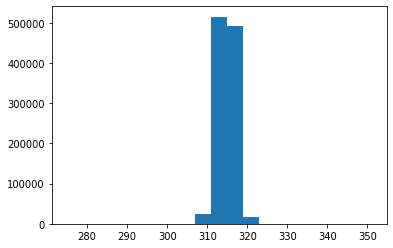

In [ ]:
#Histogram of the master file
hist(master_1D, bins=np.linspace(min_xaxis_data, max_xaxis_data, num=bin_num))

Max y value: 232989.0


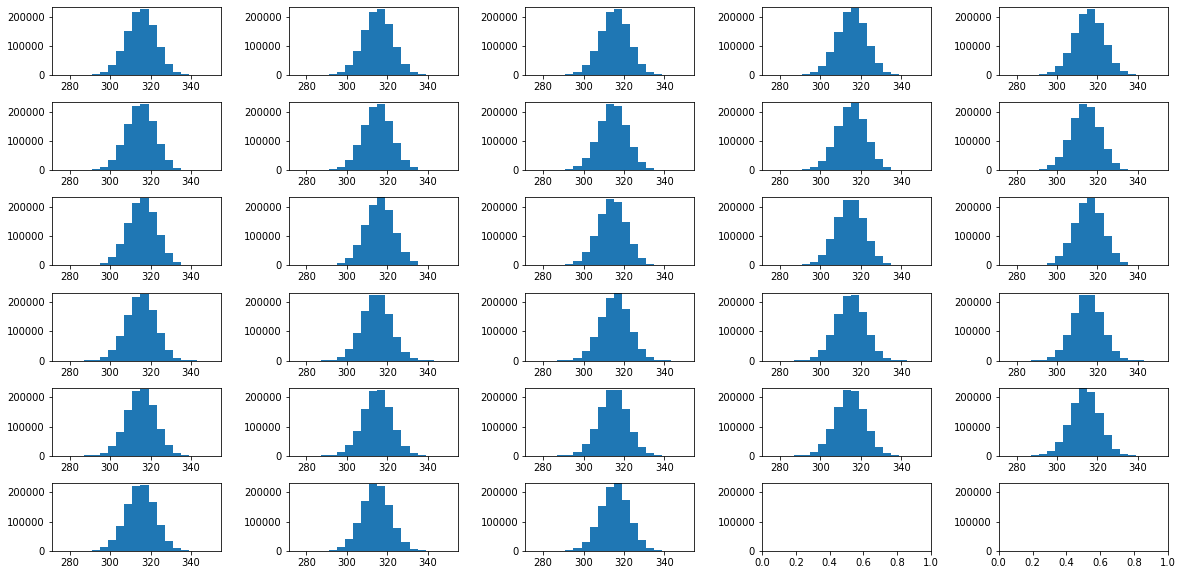

In [ ]:
#Histogram for each one of the images
bin_num=20
columns=5
rows= (subplot_number//columns)+1
fig, ax = plt.subplots(rows, columns , figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
counter = 0
max_y=0
for i in range(rows):
    for j in range(columns):
      if counter < subplot_number:
        a = hist(hist_data_list[counter], bins=np.linspace(min_xaxis_data, max_xaxis_data, num=bin_num), ax=ax[i, j])
        if max(a[0])> max_y:
          max_y=max(a[0])
        counter += 1
      else:
        break

print('Max y value:', max_y)

for row in ax:
  for a in row:  
    a.set_ylim(0, max_y)



Text(0, 0.5, 'Number of pixels')

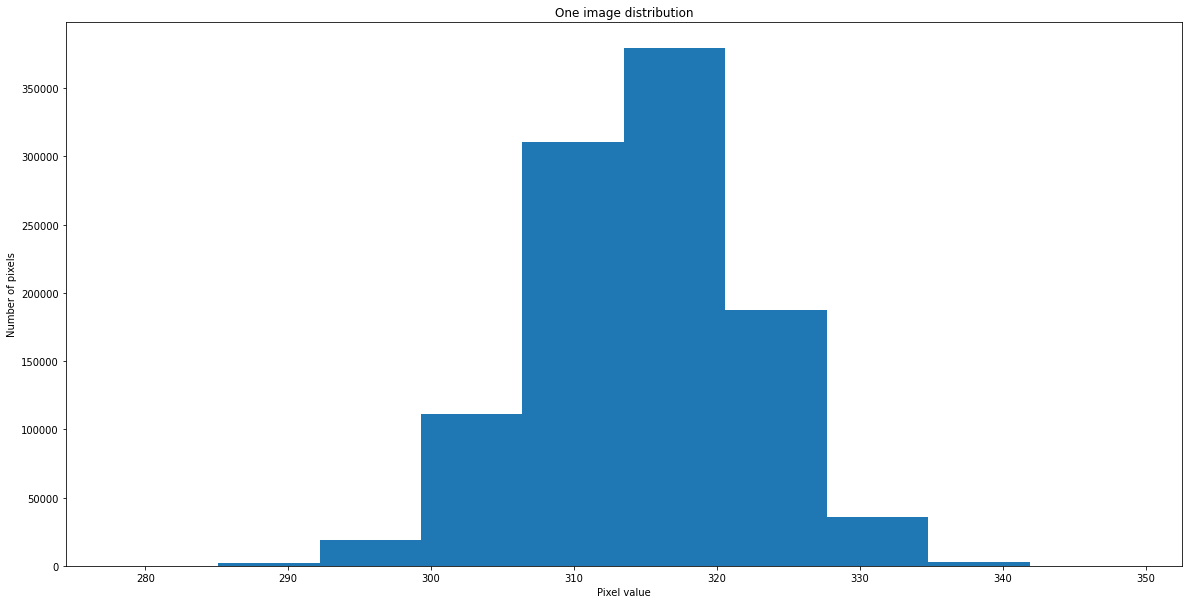

In [ ]:
#Histogram of one file
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

hist(file_1D, bins=10);
ax.set_title('One image distribution')
ax.set_xlabel('Pixel value')
ax.set_ylabel('Number of pixels')

In [ ]:
#Loading of the data from at least 3 random images to plot with the master
my_random = []
random_count = 15
for i in range(random_count):
   my_random.append(random.choice(hist_data_list))
min_number= np.min(my_random)
max_number= np.max(my_random)

print('my_random:', my_random, '\nMinimum', min_number,'\nMaximum', max_number )



my_random: [array([309, 321, 300, ..., 325, 307, 317], dtype=uint16), array([315, 306, 312, ..., 310, 318, 331], dtype=uint16), array([311, 301, 304, ..., 320, 317, 314], dtype=uint16), array([318, 304, 307, ..., 311, 318, 313], dtype=uint16), array([318, 306, 323, ..., 321, 318, 320], dtype=uint16), array([302, 315, 312, ..., 316, 307, 313], dtype=uint16), array([313, 316, 308, ..., 314, 315, 307], dtype=uint16), array([309, 312, 317, ..., 321, 312, 315], dtype=uint16), array([305, 315, 310, ..., 326, 318, 302], dtype=uint16), array([315, 311, 305, ..., 322, 313, 302], dtype=uint16), array([313, 311, 321, ..., 312, 314, 314], dtype=uint16), array([306, 311, 308, ..., 327, 312, 322], dtype=uint16), array([318, 304, 307, ..., 311, 318, 313], dtype=uint16), array([314, 306, 312, ..., 319, 308, 313], dtype=uint16), array([304, 314, 316, ..., 315, 321, 300], dtype=uint16)] 
Minimum 277 
Maximum 351


Text(0, 0.5, 'Number of pixels')

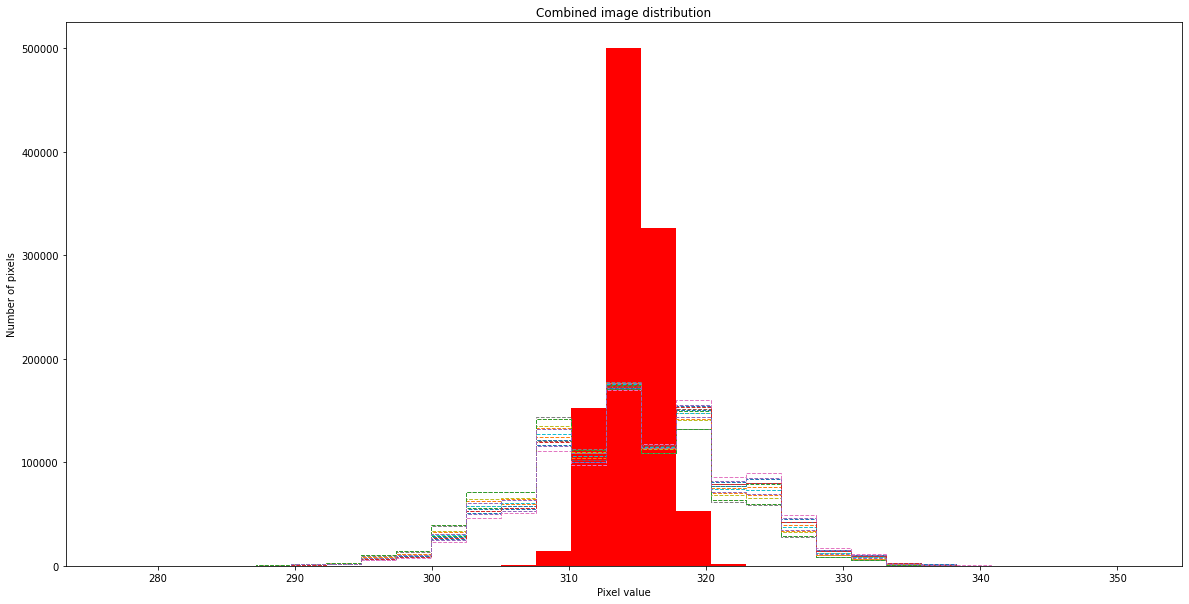

In [ ]:
#Histogram of the master(red) and of the random images
bin_num = 30
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
hist(master_1D, bins=np.linspace(min_number, max_number, num=bin_num), color='red');
for m in range(random_count):
    hist(my_random[m],bins=np.linspace(min_number, max_number, num=bin_num), ax=ax,ls='dashed', histtype=u'step');
  
ax.set_title('Combined image distribution')
ax.set_xlabel('Pixel value')
ax.set_ylabel('Number of pixels')


